# Problem Statement

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes 'Age': cutomer age in years 'Area Income': Avg. Income of geographical area of consumer 'Daily Internet Usage': Avg. minutes a day consumer is on the internet 'Ad Topic Line': Headline of the advertisement 'City': City of consumer 'Male': Whether or not consumer was male 'Country': Country of consumer 'Timestamp': Time at which consumer clicked on Ad or closed window 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Importing the Data and Data Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'E:\ML\advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [54]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [55]:
df.info()
#shows that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [56]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Feature Selection

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


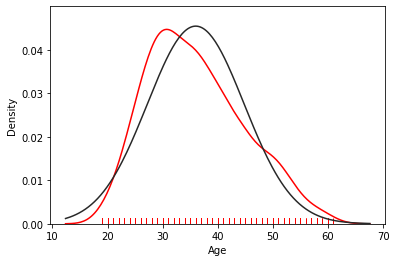

In [57]:
from scipy.stats import norm
sns.distplot(df['Age'], hist=False, color='r', rug=True, fit=norm);
#age has normal distribution

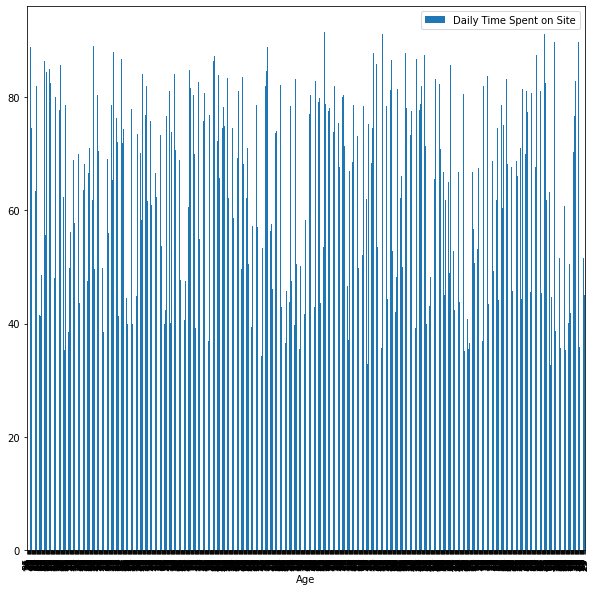

In [58]:
df.plot(x="Age",y="Daily Time Spent on Site",kind="bar",figsize=(10,10))
#to find interdependance of 2 variables(age and daily time spent on site)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


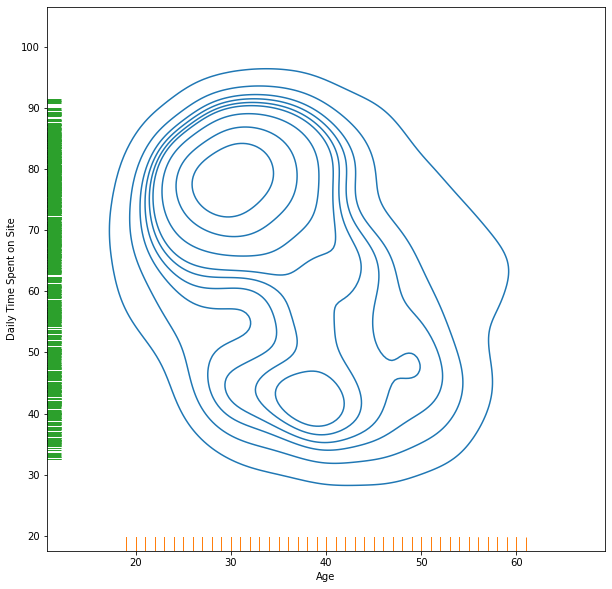

In [59]:
#cant predict anything using bar graph
#plot another graph  
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.Age, df['Daily Time Spent on Site'], ax=ax)
sns.rugplot(df.Age, ax=ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax)

Younger users spend more time on the site

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


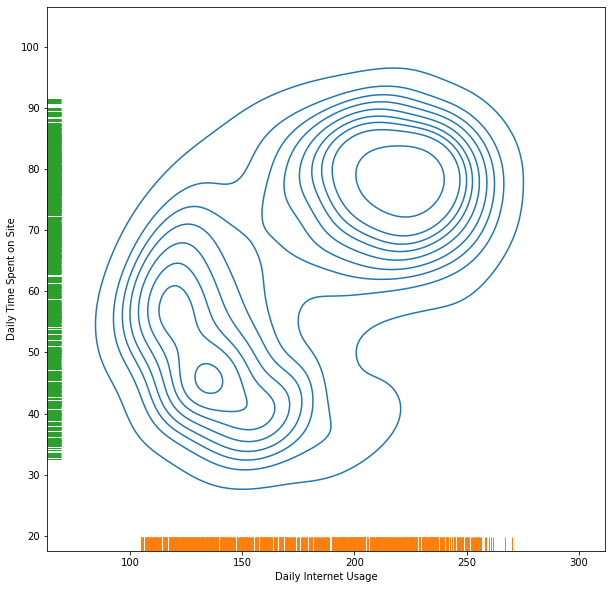

In [61]:
#to check the interdependance betweeen internet usage and time spent on site
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df['Daily Internet Usage'], df['Daily Time Spent on Site'], ax=ax)
sns.rugplot(df['Daily Internet Usage'], ax=ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax)

Users who spend more time on the internet also spend more time on the site

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f2c11e4d0>,
      dtype=object)

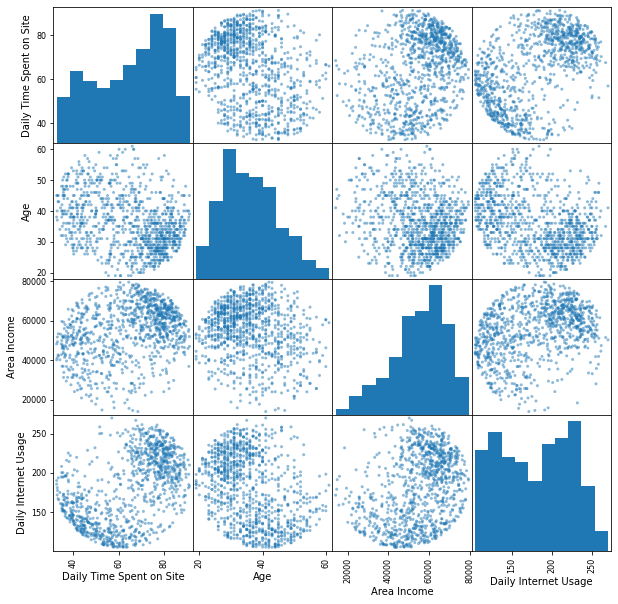

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']], figsize=(10,10))

# Data Pre-processing

In [64]:
#data preprocessing
object_variables = ['Ad Topic Line', 'City', 'Country']
df[object_variables].describe(include=['O'])
#it is difficult to perform a prediction without the existence of a data pattern. Because of that, the city and ad topic line will be omitted from further analysis. 
#there are 237 different unique countries in our dataset and no single country is too dominant, so exclude Country

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Decentralized foreground infrastructure,Lisamouth,France
freq,1,3,9


In [65]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

In [68]:
#timestamp column is been split into 4 sub columns: month,day of the month, day of the week,hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day of the month'] = df['Timestamp'].dt.day
df["Day of the week"] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [69]:
#train the model
from sklearn.model_selection import train_test_split

x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = df['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Decision-Tree Classification

In [73]:
#using decision tree
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(x_train, y_train)
predictions_DT = model_2.predict(x_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9363636363636364
Confusion matrix:
[[152  10]
 [ 11 157]]


The confusion matrix shows that the 309 predictions have been done correctly and that there are only 21incorrect predictions